# BINGO-Hackaton
**Luciano Barosi**

*BINGO Collaboration*

## Curve Fitting

### Least Square

In [2]:
from sklearn.linear_model import LinearRegression, RANSACRegressor
from scipy import linspace, polyval, polyfit, randn, optimize
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
%matplotlib inline

Let's create a set of random points with a linear trend. Observe the nice function `polyval` from scipy package. Plot the data and look, we actually have a linear jitter line.

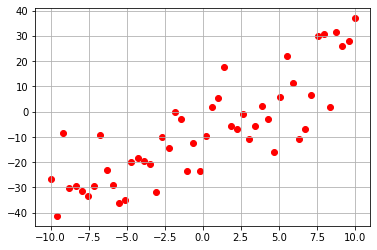

In [59]:
#sample size
def noisyLinearData(sample = 50, noise = 12):
    x=np.linspace(-10,10,sample)
    y=polyval([a,b],x)+noise*randn(sample)
    return x, y
xvar, yvar = noisyLinearData()
plt.figure()
plt.scatter(xvar,yvar,c='red', marker = 'o')
plt.grid(True)
plt.show()

For the time being, forget about the code below and consider we just fitted the function by eye.

In [60]:
#fitting function
def func(x,a1,a0):
    return a0+a1*x
popt, pcov = curve_fit(func, xvar, yvar)
yfit = polyval(popt,xvar)

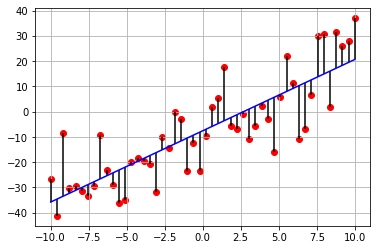

In [61]:
plt.figure()
plt.scatter(xvar,yvar,c='red', marker = 'o')
plt.plot(xvar,yfit, c = 'blue')
for ciclos in np.arange(0,len(xvar)):
    plt.vlines(xvar[ciclos],yfit[ciclos],yvar[ciclos])
plt.grid(True)
plt.show()

What fitting the data actually mean? This is a minimization procedure in which we would like to have the distance from the data to the fitted points as low as possible (in absolute value).
There are lot's of ways to define this distance and evem more ways to estimate it. Depending on the nature of your data and the knowledge you have upon them, one or another method would be more suitable.
One of the simplest methods of defining this distance is by summing the squares of the vertical distances depicted in the graphics above. Usually, by distance we mean the perpendicular distance to the curve (which is almost the $\chi^2$ definition, depending on the distribution function). The distance we just mentioned is a good estimator for this would be $\chi^2$ and it is minimization is a standard procedure in linear algebra, if we are actually considering a linear model.
If we have a set of data points $\{x_i,y_1\}$ and we want to model with a set of parameters $\beta_r$, where $r<i$, we can write our problem in matrix form:
$$\hat Y =  \hat X \hat \beta + \epsilon,$$
and we seek to minimize the function:
$$S = \left | \hat Y - \hat X \hat \beta \right |^2,$$
For a linear system, the solution for the minimization may be obtained analitically by differentiating with respect to each $\beta_i$:
$$\hat \beta = ({\hat X}^T \hat X)^{-1} {\hat X}^T \hat Y,$$
As a cautionary remark, if your system has a non-zero intercept, your matrix should have a column with $1's$ in the appropriate column, usually the first or the last.

### Least Square Fit: 6 Implementations

In [101]:
def fits(x, y):
    coefs = {}
    Xhat = np.vstack([x,np.ones(len(x))]).T
    Betahat = np.dot( np.linalg.inv( np.dot( Xhat.T, Xhat)), np.dot( Xhat.T, y ))
    print("Method = Inverse Matrix", "Coef=",Betahat[0]," Intercept=",Betahat[1])
    coefs['InverseMatrix'] = list(Betahat)
    
    coef_lst = np.linalg.lstsq(Xhat, y, rcond=None)[0]
    print("Method = Linalg", "Coef=",coef_lst[0]," Intercept=",coef_lst[1])
    coefs['lstqst'] =list(coef_lst)

    coefpoly = np.polyfit(x,y,1)
    print("Method = Polyfit", "Coef=",coefpoly[0]," Intercept=",coefpoly[1])
    coefs['Polyfit'] = list(coefpoly)
    
    coefcurve = curve_fit(func, x, y)[0]
    print("Method = Scipy CurveFit", "Coef=",coefcurve[0]," Intercept=",coefcurve[1])
    coefs['CurveFit'] = list(coefcurve)
    
    model = LinearRegression(fit_intercept=True)  
    model.fit(x[:,np.newaxis], y) 
    print("Method = Scikit", "Coef=",model.coef_[0]," Intercept=", model.intercept_)
    coefs['Scikit']= [model.coef_[0], model.intercept_ ]

    model = RANSACRegressor()
    model.fit(x[:,np.newaxis], y)
    print("Method = Scikit RANSAC", "Coef=",model.estimator_.coef_[0]," Intercept=", model.estimator_.intercept_)
    coefs['RANSAC'] = [model.estimator_.coef_[0], model.estimator_.intercept_]
    
    return coefs

Method = Inverse Matrix Coef= 3.220570772149125  Intercept= -6.509725617919501
Method = Linalg Coef= 3.2205707721491246  Intercept= -6.509725617919501
Method = Polyfit Coef= 3.2205707721491255  Intercept= -6.5097256179195035
Method = Scipy CurveFit Coef= 3.220570772216619  Intercept= -6.509725617190071
Method = Scikit Coef= 3.2205707721491246  Intercept= -6.5097256179195035
Method = Scikit RANSAC Coef= 3.2205707721491246  Intercept= -6.5097256179195035


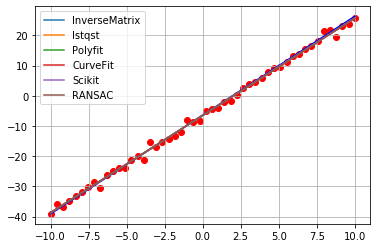

In [128]:
xvar, yvar = noisyLinearData(sample = 50, noise = 1)
coefs = fits(xvar,yvar)
plt.figure()
plt.scatter(xvar,yvar,c='red', marker = 'o')
plt.plot(xvar,yfit, c = 'blue')
for key in coefs.keys():
    yfit = polyval(coefs[key],xvar)
    plt.plot(xvar,yfit, label=key)
    plt.legend(loc='best')
    plt.grid(True)
plt.show()

Method = Inverse Matrix Coef= 3.1825824297749445  Intercept= -8.315553620622048
Method = Linalg Coef= 3.1825824297749437  Intercept= -8.315553620622044
Method = Polyfit Coef= 3.1825824297749445  Intercept= -8.315553620622048
Method = Scipy CurveFit Coef= 3.1825824375088807  Intercept= -8.31555365674291
Method = Scikit Coef= 3.1825824297749445  Intercept= -8.315553620622048
Method = Scikit RANSAC Coef= 3.0588039429702514  Intercept= -7.222625873676022


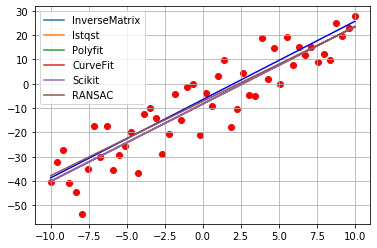

In [129]:
xvar, yvar = noisyLinearData(sample = 50, noise = 10)
coefs = fits(xvar,yvar)
plt.figure()
plt.scatter(xvar,yvar,c='red', marker = 'o')
plt.plot(xvar,yfit, c = 'blue')
for key in coefs.keys():
    yfit = polyval(coefs[key],xvar)
    plt.plot(xvar,yfit, label=key)
    plt.legend(loc='best')
    plt.grid(True)
plt.show()

### Beyond Linear Regression

This is a neat example from Python Data Science Handbook. Let's consider some random data with a sinusoidal trend and we will fit this data with a series of gaussian profiles.

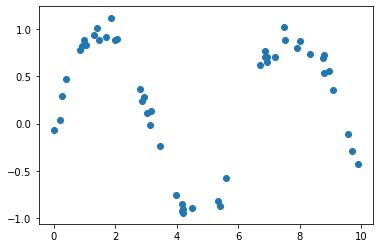

In [130]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)
plt.scatter(x, y)

We need to construct a set of basis functions, the model.

In [133]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import make_pipeline

class GaussianFeatures(BaseEstimator, TransformerMixin):
    """Uniformly spaced Gaussian features for one-dimensional input"""
    
    def __init__(self, N, width_factor=2.0):
        self.N = N
        self.width_factor = width_factor
    
    @staticmethod
    def _gauss_basis(x, y, width, axis=None):
        arg = (x - y) / width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))
        
    def fit(self, X, y=None):
        # create N centers spread along the data range
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self
        
    def transform(self, X):
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_,
                                 self.width_, axis=1)

We now build  a pipeline to iterate the model:

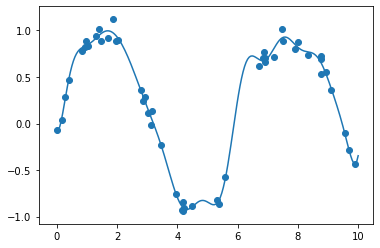

In [145]:
gauss_model = make_pipeline(GaussianFeatures(20),
                            LinearRegression())
gauss_model.fit(x[:, np.newaxis], y)
xfit = np.linspace(0,10,200)
yfit = gauss_model.predict(xfit[:, np.newaxis])
plt.plot(xfit,yfit)
plt.scatter(x,y)
